In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

El **primer paso** es realizar un **ANÁLISIS DESCRIPTIVO** del conjunto de datos que nos han proporcionado.

## 0. Lectura de datos

In [ ]:
#Indicamos la ubicación y nombre del fichero
archivo = '/content/DATASETfinal.xlsx'


In [ ]:
# df2 = pd.read_csv(archivo2, header=0, sep =",")
df = pd.read_excel(archivo, sheet_name="Hoja1")

## 1.Revisión inicial de los datos

In [ ]:
# Previsualización de los datos
df.head()

,Aerolinea,Origen,Destino,Número de vuelos,Precio medio,Duración media del vuelo,Número promedio de escalas,Promedio días de antelación,Porcentaje de vuelos business
0,Air India,Ahmedabad,Mumbai,39,257.489692,7.247223,1.000000,1.205128,0.102564
1,Vistara,Kolkata,Bangalore,4655,371.572632,15.632386,1.110849,24.836090,0.469603
2,Vistara,Ahmedabad,Bangalore,237,358.485591,6.042018,1.000000,1.662447,0.185654
3,Air India,Delhi,Chennai,178,335.645657,5.475328,0.865169,1.674157,0.488764
4,Air India,Chennai,Delhi,208,308.080120,5.213181,0.884615,1.682692,0.466346


In [ ]:
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


In [ ]:
# Información sobre el dataset (tipos de datos, columnas)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Aerolinea                      307 non-null    object 
 1   Origen                         307 non-null    object 
 2   Destino                        307 non-null    object 
 3   Número de vuelos               307 non-null    int64  
 4   Precio medio                   307 non-null    float64
 5   Duración media del vuelo       307 non-null    float64
 6   Número promedio de escalas     307 non-null    float64
 7   Promedio días de antelación    307 non-null    float64
 8   Porcentaje de vuelos business  307 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 21.7+ KB


In [ ]:
#También podemos revisar el formato de los datos
df.dtypes

,0
Aerolinea,object
Origen,object
Destino,object
Número de vuelos,int64
Precio medio,float64
Duración media del vuelo,float64
Número promedio de escalas,float64
Promedio días de antelación,float64
Porcentaje de vuelos business,float64


## 2. Análisis de nulos

In [ ]:
df.isnull().values.any() #Miramos si hay datos nulos en toda la tabla

np.False_

In [ ]:
#Dónde y cúantos nulos
print("Número de nulos en cada variable: ")
df.isnull().sum()

Número de nulos en cada variable: 


,0
Aerolinea,0
Origen,0
Destino,0
Número de vuelos,0
Precio medio,0
Duración media del vuelo,0
Número promedio de escalas,0
Promedio días de antelación,0
Porcentaje de vuelos business,0


## 3.Análisis descriptivo básico

In [ ]:
# Estadísticas descriptivas básicas
print(df.describe())

       Número de vuelos  Precio medio  Duración media del vuelo  \
count        307.000000    307.000000                307.000000   
mean        1031.061889    163.620862                  7.558204   
std         1466.712002    128.538533                  4.746328   
min            1.000000     17.781579                  0.216670   
25%           41.500000     59.441420                  4.155051   
50%          224.000000     88.605000                  6.618472   
75%         1611.500000    297.539336                 10.579957   
max         6205.000000    455.723352                 17.876137   

       Número promedio de escalas  Promedio días de antelación  \
count                  307.000000                   307.000000   
mean                     0.769267                    15.364073   
std                      0.338087                    12.016534   
min                      0.000000                     1.000000   
25%                      0.728825                     1.551630   


Escribe AQUÍ principales puntos de cada variable

## 4. Análisis de la variable de precio


In [ ]:
# Porcentaje de vuelos con al menos una escala
pct_escalas = np.round((df["Número promedio de escalas"] > 0).mean() * 100, 2)
print(f"Porcentaje de rutas con al menos una escala: {pct_escalas}%")

Porcentaje de rutas con al menos una escala: 88.27%


In [ ]:
# Porcentaje de vuelos con precio superior a la media
pct_precio_alto = np.round((df["Precio medio"] > df["Precio medio"].mean()).mean() * 100, 2)
print(f"Porcentaje de rutas con precio superior a la media: {pct_precio_alto}%")

Porcentaje de rutas con precio superior a la media: 39.74%


In [ ]:
# Porcentaje de vuelos con duración superior a la media
pct_duracion_alta = np.round((df["Duración media del vuelo"] > df["Duración media del vuelo"].mean()).mean() * 100, 2)
print(f"Porcentaje de rutas con duración superior a la media: {pct_duracion_alta}%")

Porcentaje de rutas con duración superior a la media: 43.32%


In [ ]:
import numpy as np

# 1. Identificar las columnas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns

# 2. Calcular y mostrar el porcentaje de outliers por variable
outlier_stats = {}
for c in num_cols:
    # Cálculo del IQR
    Q1, Q3 = df[c].quantile([0.25, 0.75])
    IQR = Q3 - Q1

    # Máscara de outliers (1.5·IQR)
    mask = (df[c] < Q1 - 1.5 * IQR) | (df[c] > Q3 + 1.5 * IQR)

    # Porcentaje de outliers
    pct = mask.mean() * 100
    outlier_stats[c] = pct

    print(f"{c}: {pct:.2f}% outliers detectados")

# 3.Mostrar algunos ejemplos de valores atípicos
for c, pct in outlier_stats.items():
    if pct > 0:
        print(f"\nPrimeros outliers en '{c}':")
        print(df.loc[
            (df[c] < df[c].quantile(0.25) - 1.5 * IQR) |
            (df[c] > df[c].quantile(0.75) + 1.5 * IQR),
            c
        ].head(5))


Número de vuelos: 7.82% outliers detectados
Precio medio: 0.00% outliers detectados
Duración media del vuelo: 0.00% outliers detectados
Número promedio de escalas: 14.33% outliers detectados
Promedio días de antelación: 0.00% outliers detectados
Porcentaje de vuelos business: 0.00% outliers detectados

Primeros outliers en 'Número de vuelos':
0      39
1    4655
5    3098
7    3479
9    4083
Name: Número de vuelos, dtype: int64

Primeros outliers en 'Número promedio de escalas':
199    0.0
200    0.0
201    0.0
202    0.0
203    0.0
Name: Número promedio de escalas, dtype: float64


In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].interpolate(method='linear', limit_direction='both')
print("Nulos tras interpolar:", df[num_cols].isnull().sum().sum())



Nulos tras interpolar: 0


In [ ]:
for c in num_cols:
    if (df[c] > 0).all():
        df[f"{c}_log"] = np.log1p(df[c])
# Ahora tienes columnas nuevas con el sufijo _log

In [ ]:
df.to_csv('processed_dataset.csv', index=False)
print("✔ Datos procesados guardados en 'processed_dataset.csv'")

✔ Datos procesados guardados en 'processed_dataset.csv'


In [ ]:
import pandas as pd

data_dict = pd.DataFrame([{
    'variable': c,
    'dtype': str(df[c].dtype),
    'n_unique': df[c].nunique(),
    'n_missing': df[c].isnull().sum(),
    'sample_vals': df[c].dropna().unique()[:5].tolist()
} for c in df.columns])

display(data_dict)


,variable,dtype,n_unique,n_missing,sample_vals
0,Aerolinea,object,11,0,"[Air India, Vistara, SpiceJet, GO FIRST, AirAsia]"
1,Origen,object,7,0,"[Ahmedabad, Kolkata, Delhi, Chennai, Mumbai]"
2,Destino,object,7,0,"[Mumbai, Bangalore, Chennai, Delhi, Kolkata]"
3,Número de vuelos,int64,237,0,"[39, 4655, 237, 178, 208]"
4,Precio medio,float64,307,0,"[257.4896923076923, 371.57263157894914, 358.48..."
5,Duración media del vuelo,float64,303,0,"[7.24722282051282, 15.63238630504819, 6.042017..."
6,Número promedio de escalas,float64,219,0,"[1.0, 1.1108485499462943, 0.8651685393258427, ..."
7,Promedio días de antelación,float64,252,0,"[1.205128205128205, 24.83609022556391, 1.66244..."
8,Porcentaje de vuelos business,float64,115,0,"[0.10256410256410256, 0.46960257787325455, 0.1..."
9,Número de vuelos_log,float64,237,0,"[3.6888794541139363, 8.445911989411274, 5.4722..."


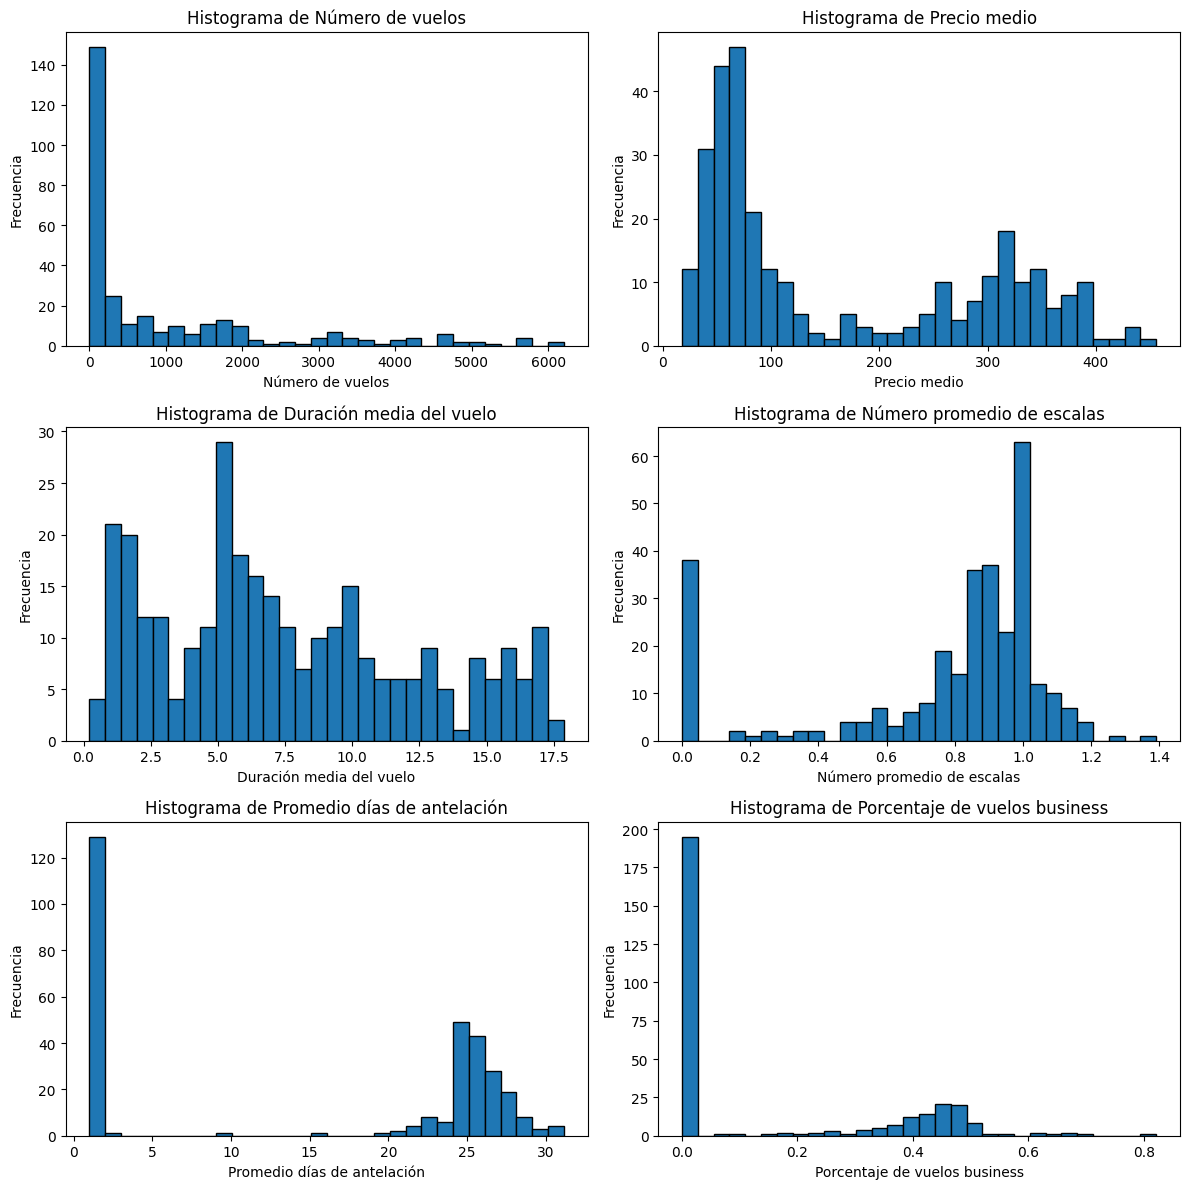

In [ ]:
import matplotlib.pyplot as plt

#  variables numéricas a graficar
num_cols = [
    'Número de vuelos',
    'Precio medio',
    'Duración media del vuelo',
    'Número promedio de escalas',
    'Promedio días de antelación',
    'Porcentaje de vuelos business'
]

# Configuracion de la figura y los ejes 3 filas × 2 columnas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

# Cada histograma en su subplot
for ax, col in zip(axes, num_cols):
    ax.hist(df[col], bins=30, edgecolor='k')
    ax.set_title(f'Histograma de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# eliminar si sobran ejes
for ax in axes[len(num_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


                    Ruta  n_rutas
0         Mumbai – Delhi        9
1       Chennai – Mumbai        9
2  Hyderabad – Bangalore        9
3         Delhi – Mumbai        9
4      Bangalore – Delhi        9
5       Mumbai – Chennai        9
6    Bangalore – Chennai        9
7      Delhi – Bangalore        9
8     Mumbai – Bangalore        9
9     Bangalore – Mumbai        9


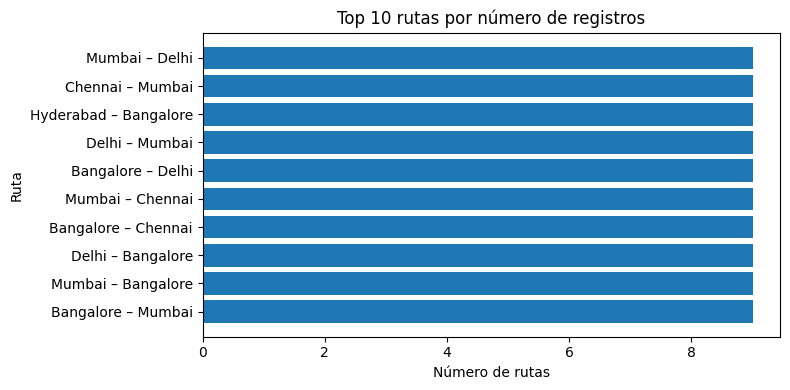

In [ ]:
# 1. Definir la nueva columna
df['Ruta'] = df['Origen'] + ' – ' + df['Destino']

# 2. Calcular el número de rutas registradas
ruta_counts = df['Ruta'].value_counts().reset_index()
ruta_counts.columns = ['Ruta', 'n_rutas']

# 3. Mostrar las top 10 rutas
print(ruta_counts.head(10))

# 4. Gráfico de barras de las 10 rutas más frecuentes
import matplotlib.pyplot as plt

topn = ruta_counts.head(10)
plt.figure(figsize=(8,4))
plt.barh(topn['Ruta'], topn['n_rutas'])
plt.gca().invert_yaxis()
plt.title('Top 10 rutas por número de registros')
plt.xlabel('Número de rutas')
plt.ylabel('Ruta')
plt.tight_layout()
plt.show()


<ipython-input-36-e7d6fe392a7b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Aerolinea', palette=palette, order=df['Aerolinea'].value_counts().index)
<ipython-input-36-e7d6fe392a7b>:22: UserWarning: 
The palette list has fewer values (8) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='Aerolinea', palette=palette, order=df['Aerolinea'].value_counts().index)


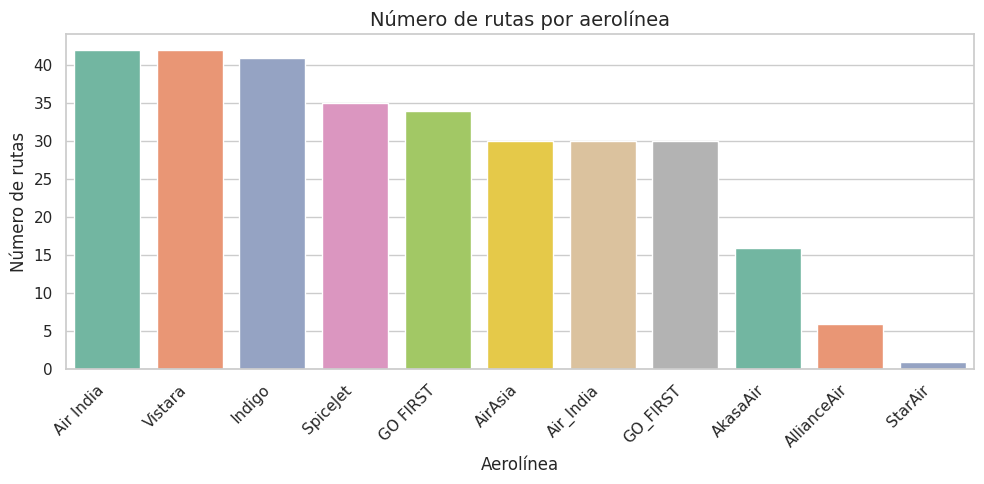

<ipython-input-36-e7d6fe392a7b>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Origen', palette=palette, order=df['Origen'].value_counts().index)
<ipython-input-36-e7d6fe392a7b>:35: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.countplot(data=df, x='Origen', palette=palette, order=df['Origen'].value_counts().index)


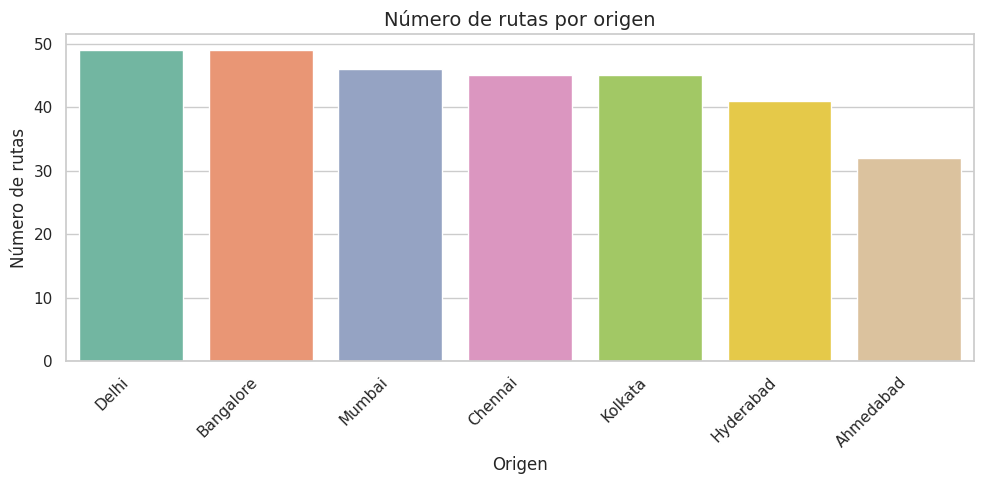

<ipython-input-36-e7d6fe392a7b>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Destino', palette=palette, order=df['Destino'].value_counts().index)
<ipython-input-36-e7d6fe392a7b>:48: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.countplot(data=df, x='Destino', palette=palette, order=df['Destino'].value_counts().index)


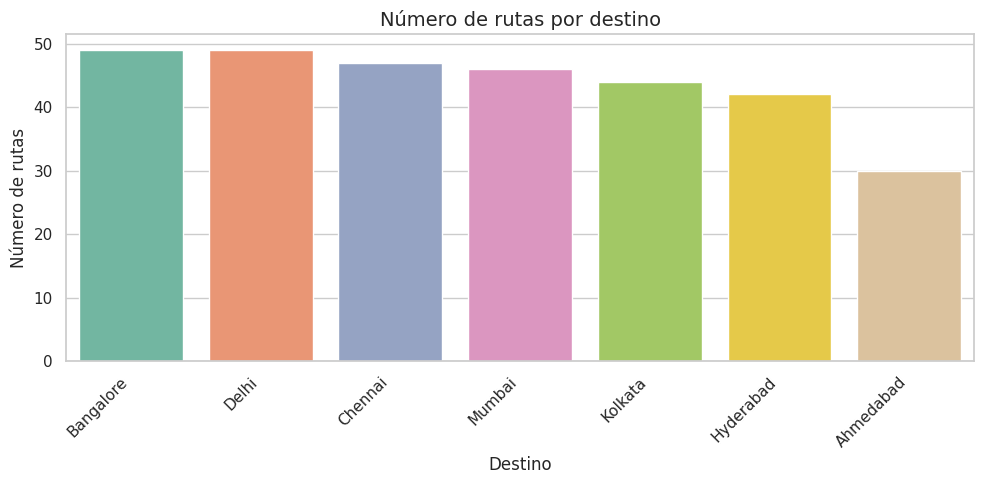

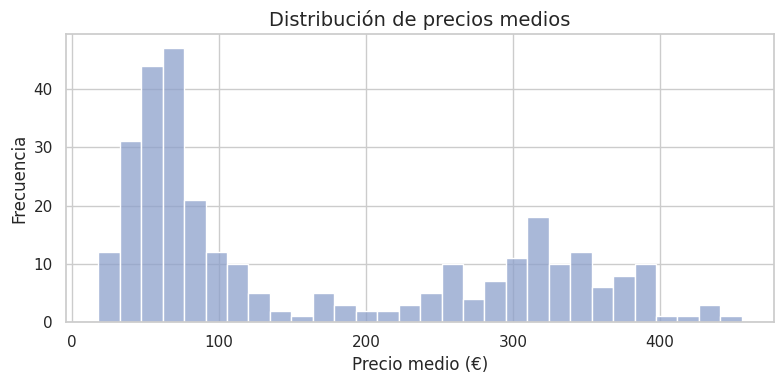

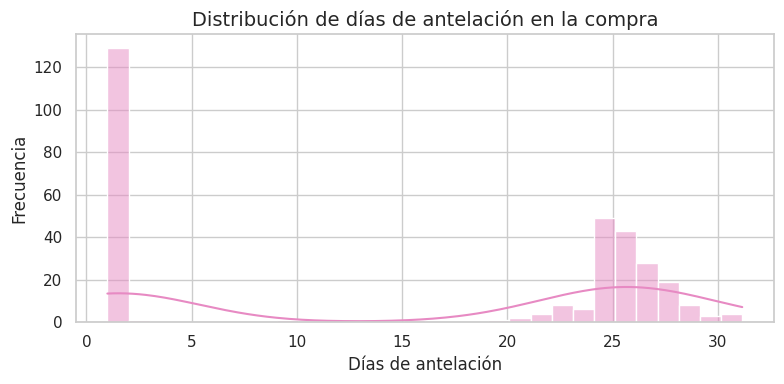

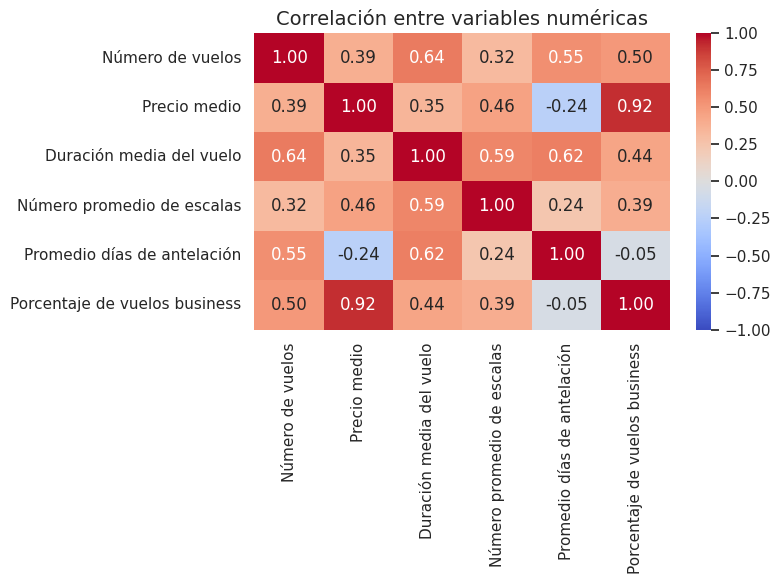

,Valor
Total de rutas,307.00
Rutas únicas,NaN
Precio medio global (€),163.62
Duración media global (h),7.56
Antelación media (días),15.36
% medio business,15.56


<ipython-input-36-e7d6fe392a7b>:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ruta_counts, y='Ruta', x='n_registros', palette=palette)
<ipython-input-36-e7d6fe392a7b>:136: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ruta_counts, y='Ruta', x='n_registros', palette=palette)


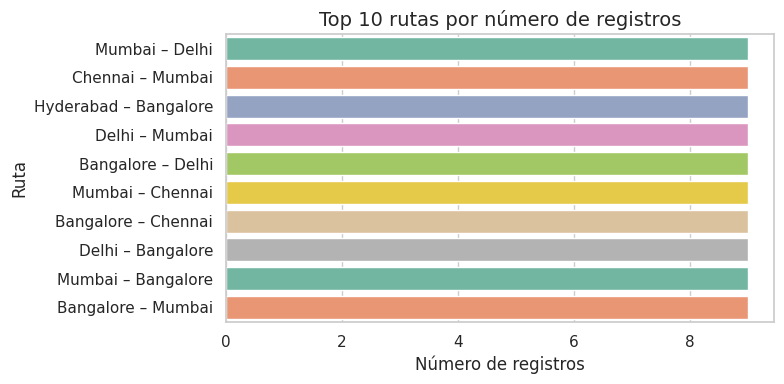

from matplotlib import pyplot as plt
_df_0['Valor'].plot(kind='hist', bins=20, title='Valor')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Valor'].plot(kind='line', figsize=(8, 4), title='Valor')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Valor', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# %% [markdown]




df = pd.read_csv('processed_dataset.csv')

# Definir paleta de color
sns.set_theme(style='whitegrid')
palette = sns.color_palette("Set2")  # paleta coherente para todas las gráficas

# %% [markdown]
# Gráfico de barras: Número de rutas por aerolínea

# %%
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Aerolinea', palette=palette, order=df['Aerolinea'].value_counts().index)
plt.title('Número de rutas por aerolínea', fontsize=14)
plt.xlabel('Aerolínea')
plt.ylabel('Número de rutas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# %% [markdown]
# Gráfico de barras: Número de rutas por origen

# %%
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Origen', palette=palette, order=df['Origen'].value_counts().index)
plt.title('Número de rutas por origen', fontsize=14)
plt.xlabel('Origen')
plt.ylabel('Número de rutas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# %% [markdown]
# #Gráfico de barras: Número de rutas por destino

# %%
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Destino', palette=palette, order=df['Destino'].value_counts().index)
plt.title('Número de rutas por destino', fontsize=14)
plt.xlabel('Destino')
plt.ylabel('Número de rutas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# %% [markdown]
# Histograma: Distribución de precios medios

# %%
plt.figure(figsize=(8,4))
sns.histplot(df['Precio medio'], bins=30, kde=False, color=palette[2])
plt.title('Distribución de precios medios', fontsize=14)
plt.xlabel('Precio medio (€)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# %% [markdown]
# Histograma: Días de antelación de compra

# %%
plt.figure(figsize=(8,4))
sns.histplot(df['Promedio días de antelación'], bins=30, kde=True, color=palette[3])
plt.title('Distribución de días de antelación en la compra', fontsize=14)
plt.xlabel('Días de antelación')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# %% [markdown]
# Boxplot de precio medio por Clase *(si tuvieras la variable “Clase”)*

# %%
if 'Clase' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x='Clase', y='Precio medio', palette=palette)
    plt.title('Distribución de precios por clase', fontsize=14)
    plt.xlabel('Clase')
    plt.ylabel('Precio medio (€)')
    plt.tight_layout()
    plt.show()

# %% [markdown]
# #Heatmap de correlación entre variables numéricas

# %%
num_cols = ['Número de vuelos', 'Precio medio', 'Duración media del vuelo',
            'Número promedio de escalas', 'Promedio días de antelación',
            'Porcentaje de vuelos business']
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlación entre variables numéricas', fontsize=14)
plt.tight_layout()
plt.show()

# %% [markdown]
# KPIs principales

# Calculo algunos KPIs
kpis = {
    'Total de rutas': len(df),
    'Rutas únicas': df['Ruta'].nunique() if 'Ruta' in df.columns else np.nan,
    'Precio medio global (€)': df['Precio medio'].mean().round(2),
    'Duración media global (h)': df['Duración media del vuelo'].mean().round(2),
    'Antelación media (días)': df['Promedio días de antelación'].mean().round(2),
    '% medio business': (df['Porcentaje de vuelos business'].mean()*100).round(2)
}
kpi_df = pd.DataFrame.from_dict(kpis, orient='index', columns=['Valor'])
display(kpi_df)

# %% [markdown]
# Top 10 rutas por número de registros

# %%
# he creado la varaiable ruta bien?
if 'Ruta' not in df.columns:
    df['Ruta'] = df['Origen'] + ' – ' + df['Destino']

ruta_counts = df['Ruta'].value_counts().head(10).reset_index()
ruta_counts.columns = ['Ruta', 'n_registros']

plt.figure(figsize=(8,4))
sns.barplot(data=ruta_counts, y='Ruta', x='n_registros', palette=palette)
plt.title('Top 10 rutas por número de registros', fontsize=14)
plt.xlabel('Número de registros')
plt.ylabel('Ruta')
plt.tight_layout()
plt.show()


<ipython-input-37-7cdf9887d106>:33: UserWarning: 
The palette list has fewer values (8) than needed (237) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


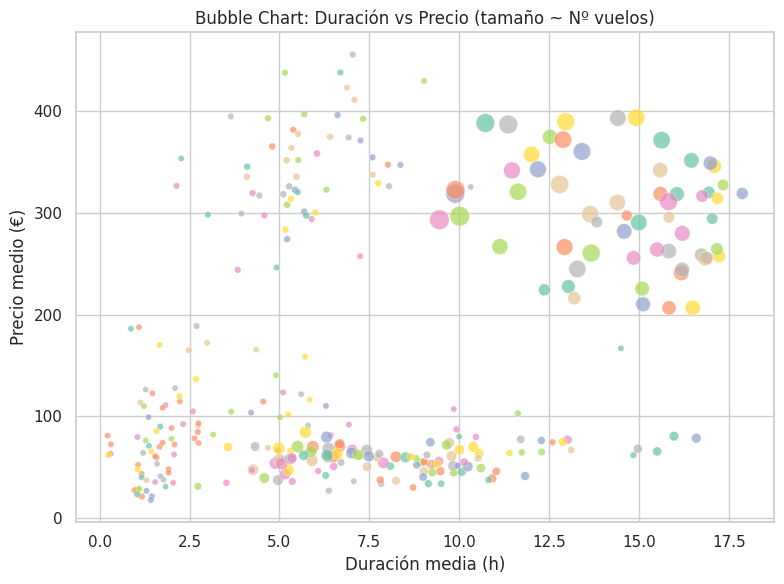

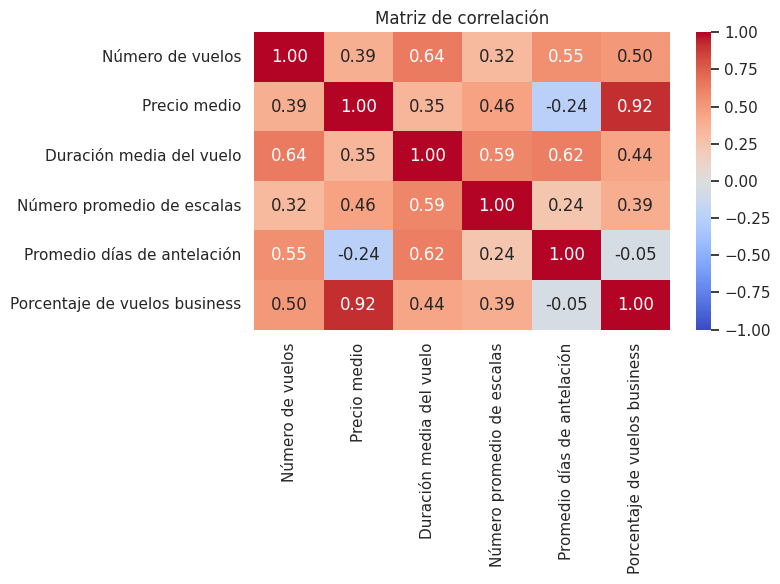

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

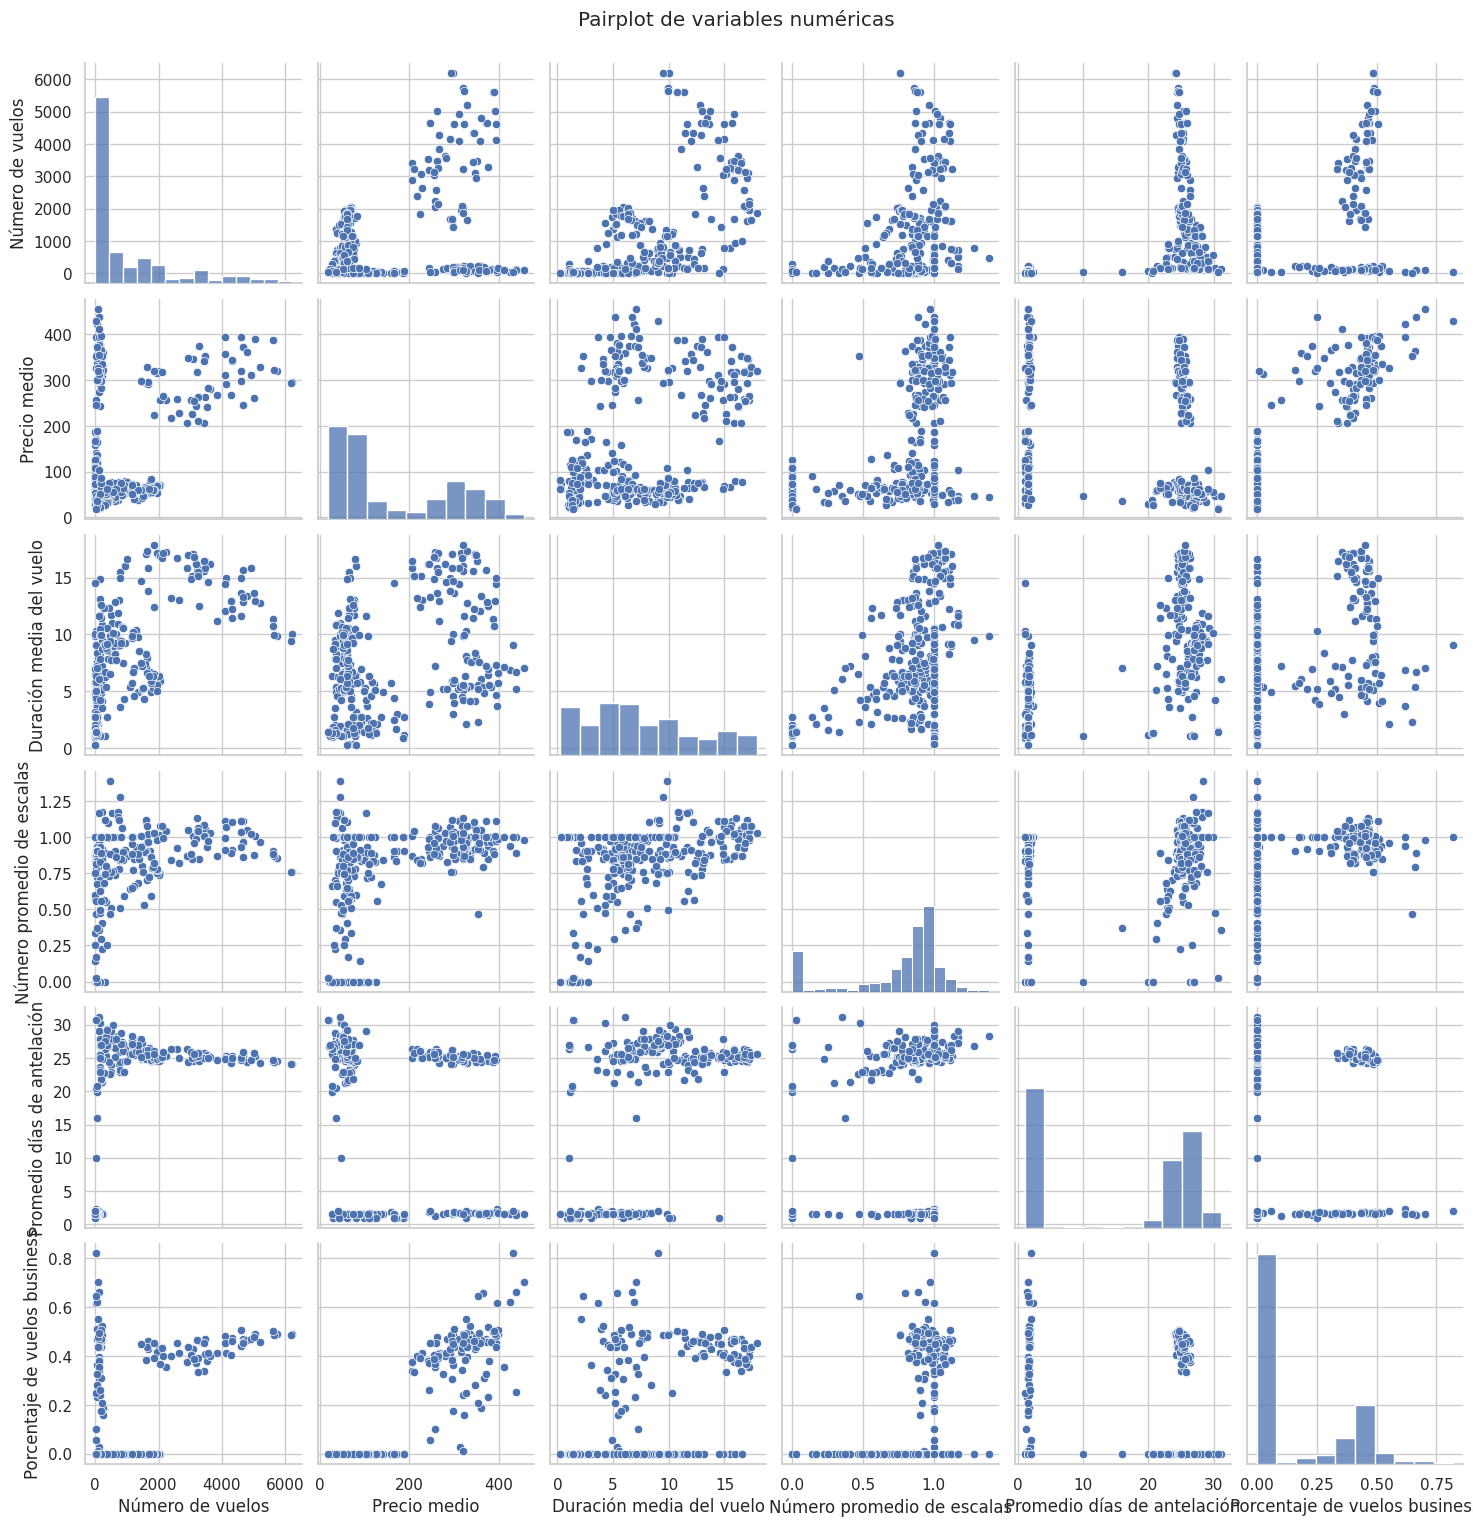

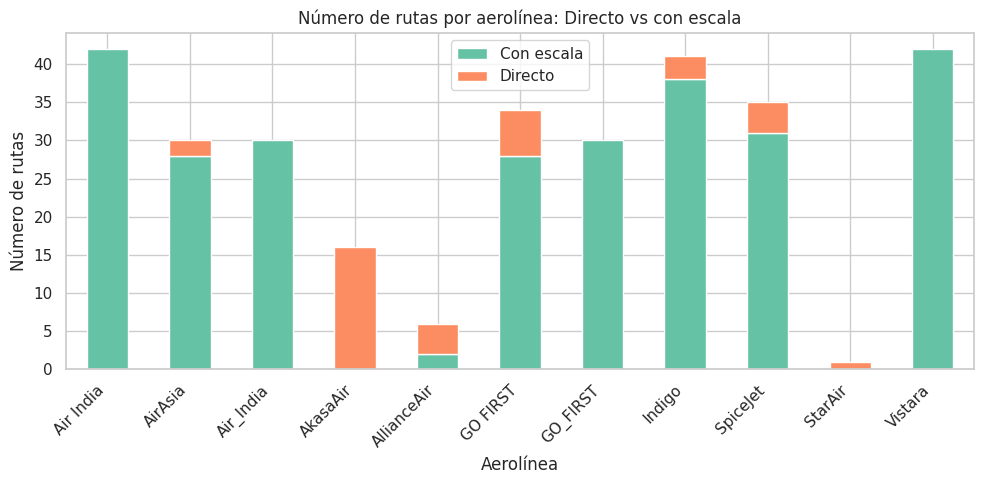

<ipython-input-37-7cdf9887d106>:102: UserWarning:

The palette list has more values (8) than needed (3), which may not be intended.



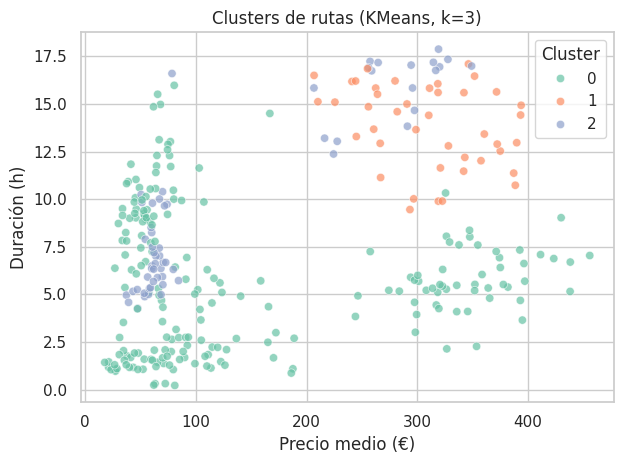

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# --- Preparación ---
df = pd.read_csv('processed_dataset.csv')  # Ajusta ruta si hace falta
sns.set_theme(style='whitegrid')
palette = sns.color_palette("Set2")

# Crear Ruta si no existe
if 'Ruta' not in df.columns:
    df['Ruta'] = df['Origen'] + ' – ' + df['Destino']

# Crear variable Directo vs Con escalas
df['Directo'] = np.where(df['Número promedio de escalas']==0, 'Directo', 'Con escala')

# Columnas numéricas
num_cols = [
    'Número de vuelos',
    'Precio medio',
    'Duración media del vuelo',
    'Número promedio de escalas',
    'Promedio días de antelación',
    'Porcentaje de vuelos business'
]

# Bubble chart (Duración vs Precio, tamaño = Nº vuelos) ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Duración media del vuelo',
    y='Precio medio',
    size='Número de vuelos',
    sizes=(20, 200),
    hue='Número de vuelos',
    palette=palette,
    legend=None,
    alpha=0.7
)
plt.title('Bubble Chart: Duración vs Precio (tamaño ~ Nº vuelos)')
plt.xlabel('Duración media (h)')
plt.ylabel('Precio medio (€)')
plt.tight_layout()
plt.show()

# Heatmap de correlación ---
plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.tight_layout()
plt.show()

#  Pairplot de variables numéricas ---
sns.pairplot(df[num_cols], diag_kind='hist', palette=palette)
plt.suptitle('Pairplot de variables numéricas', y=1.02)
plt.show()

# Gráfico 3D (Duración, Precio, % Business) ---
fig = px.scatter_3d(
    df,
    x='Duración media del vuelo',
    y='Precio medio',
    z='Porcentaje de vuelos business',
    size='Número de vuelos',
    color='Aerolinea',
    title='Scatter 3D: Duración vs Precio vs % Business',
    labels={
        'Duración media del vuelo':'Duración (h)',
        'Precio medio':'Precio (€)',
        'Porcentaje de vuelos business':'% Business'
    },
    width=800, height=600
)
fig.show()

#  Gráfico apilado: Rutas directas vs con escala por aerolínea ---
stacked = df.groupby(['Aerolinea','Directo']).size().unstack(fill_value=0)
stacked.plot(
    kind='bar',
    stacked=True,
    figsize=(10,5),
    color=palette[:2]
)
plt.title('Número de rutas por aerolínea: Directo vs con escala')
plt.xlabel('Aerolínea')
plt.ylabel('Número de rutas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='')
plt.tight_layout()
plt.show()

# Clusterización y visualización de clusters ---
# Aplicar KMeans sobre num_cols
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[num_cols])
df['Cluster'] = kmeans.labels_.astype(str)

sns.scatterplot(
    data=df,
    x='Precio medio',
    y='Duración media del vuelo',
    hue='Cluster',
    palette=palette,
    alpha=0.7
)
plt.title('Clusters de rutas (KMeans, k=3)')
plt.xlabel('Precio medio (€)')
plt.ylabel('Duración (h)')
plt.tight_layout()
plt.show()


,Media,Mediana,Desviación estándar,Mínimo,Máximo,Asimetría (skew),Curtosis
Variable,,,,,,,
Número de vuelos,1031.06,224.00,1466.71,1.00,6205.00,1.67,1.96
Precio medio,163.62,88.60,128.54,17.78,455.72,0.62,-1.24
Duración media del vuelo,7.56,6.62,4.75,0.22,17.88,0.45,-0.80
Número promedio de escalas,0.77,0.89,0.34,0.00,1.39,-1.38,0.74
Promedio días de antelación,15.36,24.16,12.02,1.00,31.16,-0.26,-1.88
Porcentaje de vuelos business,0.16,0.00,0.22,0.00,0.82,0.84,-0.93


<Figure size 1200x1200 with 0 Axes>

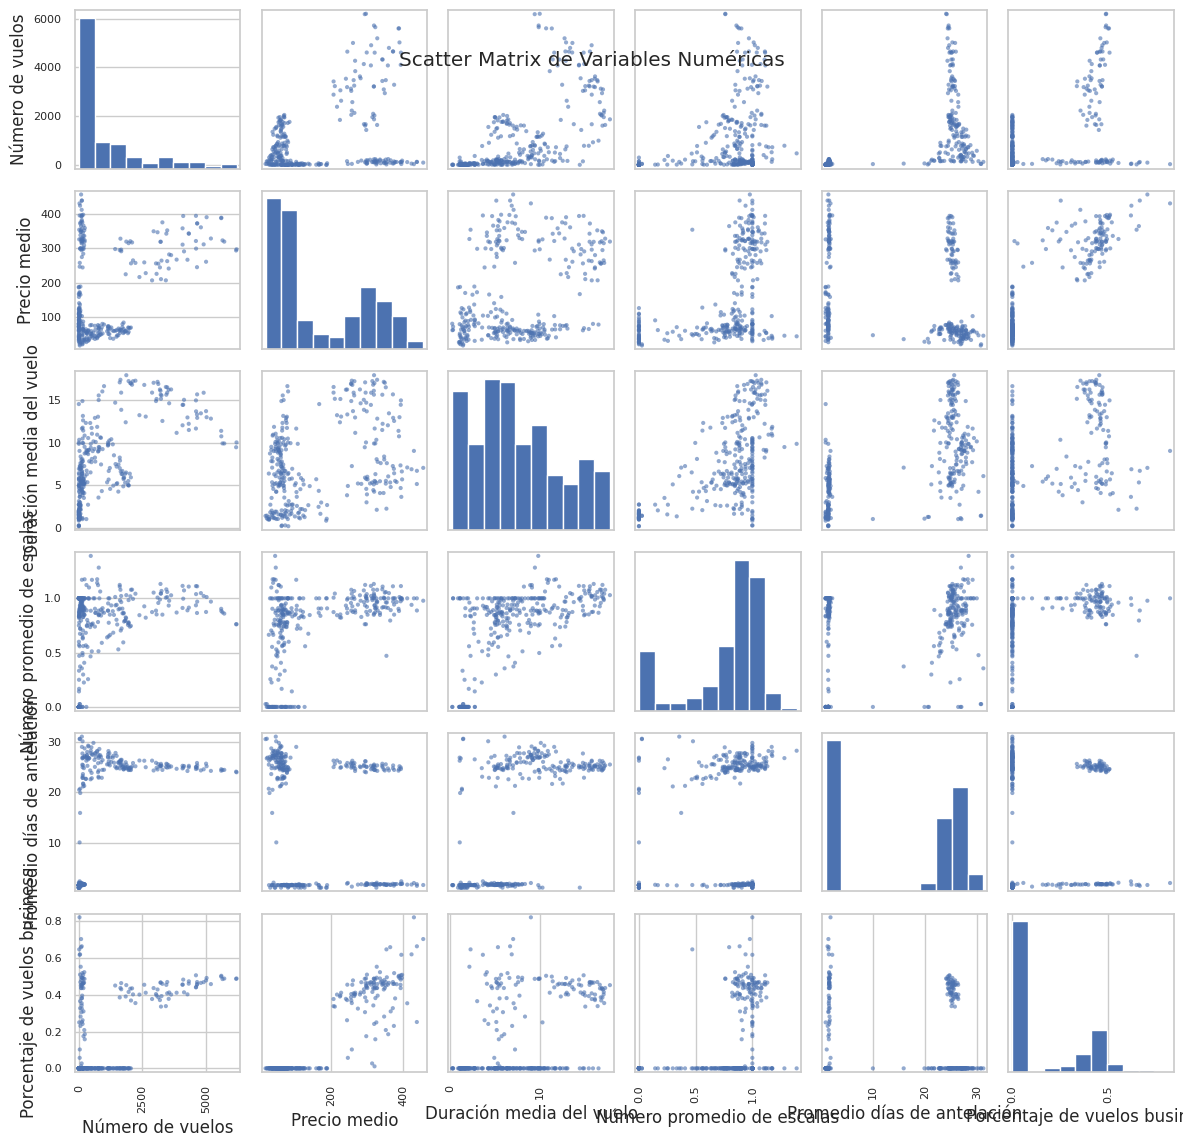

In [ ]:
# 1. Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# 2. Carga de datos

df = pd.read_csv('processed_dataset.csv')

# 3. Selección de variables numéricas
num_cols = [
    'Número de vuelos',
    'Precio medio',
    'Duración media del vuelo',
    'Número promedio de escalas',
    'Promedio días de antelación',
    'Porcentaje de vuelos business'
]

# 4. Cálculo de estadísticos descriptivos ampliados
stats_df = pd.DataFrame({
    'Media':                  df[num_cols].mean(),
    'Mediana':                df[num_cols].median(),
    'Desviación estándar':    df[num_cols].std(),
    'Mínimo':                 df[num_cols].min(),
    'Máximo':                 df[num_cols].max(),
    'Asimetría (skew)':       df[num_cols].skew(),
    'Curtosis':               df[num_cols].kurtosis()
}).round(2)
stats_df.index.name = 'Variable'
display(stats_df)

# 5. Scatter Matrix (matriz de dispersión con histogramas)
plt.figure(figsize=(12,12))
scatter_matrix(df[num_cols], alpha=0.6, diagonal='hist', figsize=(12,12))
plt.suptitle('Scatter Matrix de Variables Numéricas', y=0.92)
plt.tight_layout()
plt.show()


Habla AQUÍ sobre las principales correlaciones

# Aplicar Estandarización y One-Hot Encoding en tu dataset

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

In [ ]:
# 1. Estandarización de variables numéricas
scaler = StandardScaler()
numerical_cols = ['Número de vuelos', 'Precio medio', 'Duración media del vuelo',
 'Número promedio de escalas', 'Promedio días de antelación',
 'Porcentaje de vuelos business']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [ ]:
# 2. One-Hot Encoding para variables categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Cambio aquí
categorical_cols = ['Aerolinea', 'Origen', 'Destino']
encoded_data = encoder.fit_transform(df[categorical_cols])

In [ ]:
# Convertir a DataFrame y añadir nombres de columnas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))


In [ ]:
# Concatenar con el dataset original (sin las columnas categóricas originales)
df_final = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)


In [ ]:
# Guardar el nuevo dataset
df_final.to_csv("/content/DATASETfinal.xlsx", index=False)


# Diagramas de dispersión
Estos gráficos permiten visualizar la relación entre el precio medio y variables como la duración del vuelo y el número de escalas.

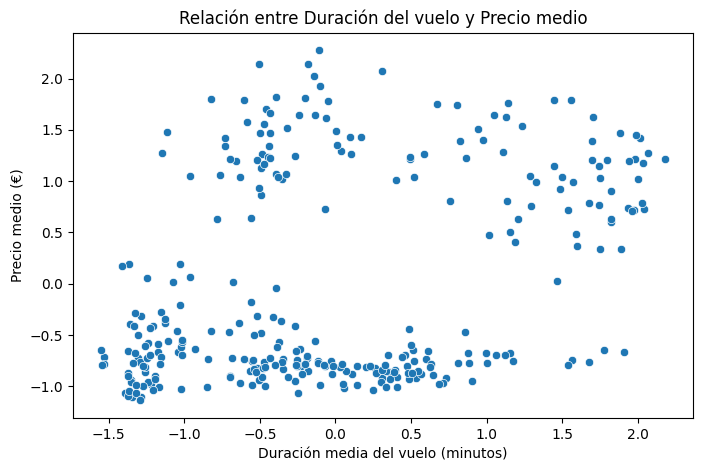

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diagrama de dispersión: Precio medio vs Duración media del vuelo
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Duración media del vuelo"], y=df["Precio medio"])
plt.title("Relación entre Duración del vuelo y Precio medio")
plt.xlabel("Duración media del vuelo (minutos)")
plt.ylabel("Precio medio (€)")
plt.show()

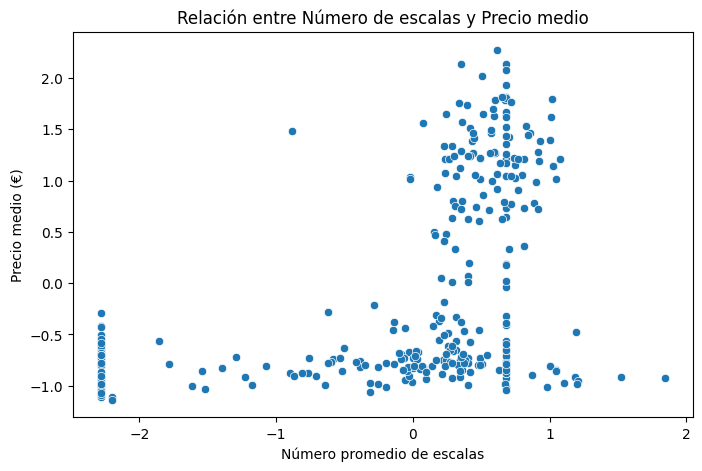

In [ ]:
# Diagrama de dispersión: Precio medio vs Número de escalas
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Número promedio de escalas"], y=df["Precio medio"])
plt.title("Relación entre Número de escalas y Precio medio")
plt.xlabel("Número promedio de escalas")
plt.ylabel("Precio medio (€)")
plt.show()


# Comparación de precios por aerolínea (Boxplot)
Para analizar qué aerolíneas tienen precios más altos o bajos en promedio.

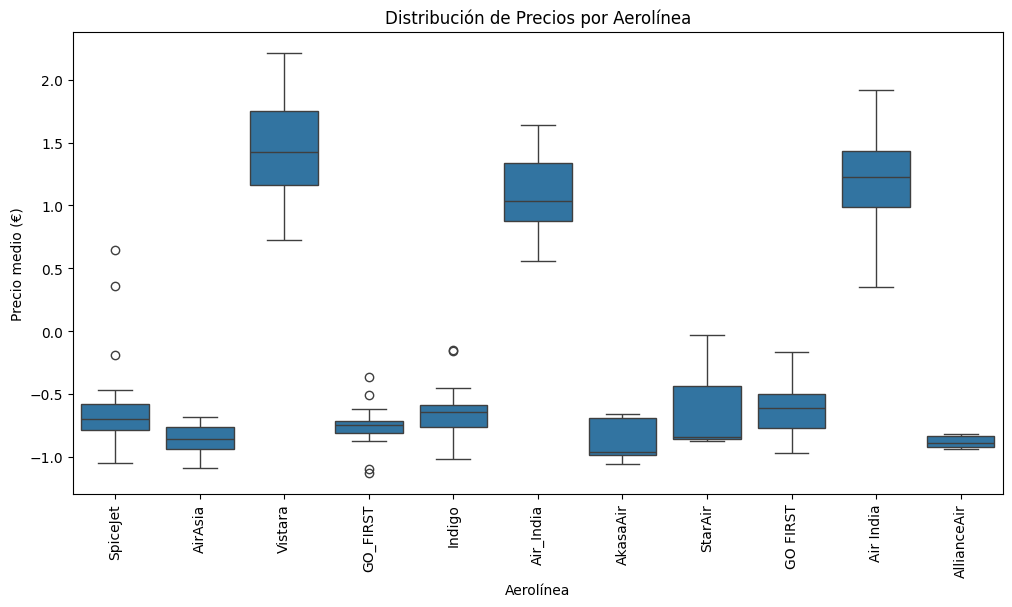

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Aerolinea", y="Precio medio en €", data=df)
plt.xticks(rotation=90)
plt.title("Distribución de Precios por Aerolínea")
plt.xlabel("Aerolínea")
plt.ylabel("Precio medio (€)")
plt.show()


# Tabla resumen: Aerolíneas más caras y más baratas
Creamos una tabla con las aerolíneas ordenadas por precio medio.


In [ ]:
aerolineas_precio = df.groupby("Aerolinea")["Precio medio en €"].mean().sort_values(ascending=False)
print(aerolineas_precio)


Aerolinea
Vistara        1.443490
Air India      1.247470
Air_India      1.073353
StarAir       -0.581797
SpiceJet      -0.629658
GO FIRST      -0.632498
Indigo        -0.656342
GO_FIRST      -0.753101
AirAsia       -0.853689
AllianceAir   -0.880457
AkasaAir      -0.880771
Name: Precio medio en €, dtype: float64


In [ ]:
##Para mostrar solo las 3 aerolíneas más caras y más baratas

print("Las 3 aerolíneas más caras:")
print(aerolineas_precio.head(3))

print("\nLas 3 aerolíneas más baratas:")
print(aerolineas_precio.tail(3))


Las 3 aerolíneas más caras:
Aerolinea
Vistara      1.443490
Air India    1.247470
Air_India    1.073353
Name: Precio medio en €, dtype: float64

Las 3 aerolíneas más baratas:
Aerolinea
AirAsia       -0.853689
AllianceAir   -0.880457
AkasaAir      -0.880771
Name: Precio medio en €, dtype: float64


# Rutas con los precios más altos y más bajos
Queremos identificar qué rutas (combinación de origen y destino) tienen los precios más elevados y más económicos.

In [ ]:
rutas_precio = df.groupby(["Origen", "Destino"])["Precio medio en €"].mean().sort_values(ascending=False)
print("Las 5 rutas más caras:")
print(rutas_precio.head(5))

print("\nLas 5 rutas más baratas:")
print(rutas_precio.tail(5))


Las 5 rutas más caras:
Origen     Destino  
Ahmedabad  Chennai      0.442200
Kolkata    Ahmedabad    0.360709
Ahmedabad  Kolkata      0.339671
Chennai    Kolkata      0.325086
Kolkata    Bangalore    0.314681
Name: Precio medio en €, dtype: float64

Las 5 rutas más baratas:
Origen     Destino  
Bangalore  Chennai     -0.190110
Hyderabad  Bangalore   -0.224285
Bangalore  Hyderabad   -0.226078
Ahmedabad  Delhi       -0.310728
Delhi      Ahmedabad   -0.465628
Name: Precio medio en €, dtype: float64
